# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/British Airways Project./customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [7]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [8]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [9]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [10]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [11]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [12]:
df.shape

(50000, 14)

In [13]:
df.isnull().sum()   # No null values are found in the data.

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


In [14]:
df[df.duplicated()].count()[0]     # 719 duplicate rows are found in the data.

<ipython-input-14-5c65d258a2f9>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[df.duplicated()].count()[0]     # 719 duplicate rows are found in the data.


719

In [15]:
df[df.duplicated()].head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
196,5,Internet,RoundTrip,206,17,13,7,AKLKUL,Malaysia,1,0,0,8.83,0
316,5,Internet,RoundTrip,206,17,13,7,AKLKUL,Malaysia,1,0,0,8.83,0
384,5,Internet,RoundTrip,206,17,13,7,AKLKUL,Malaysia,1,0,0,8.83,0
456,1,Internet,RoundTrip,30,85,15,5,AKLKUL,Malaysia,1,0,0,8.83,1
513,3,Internet,RoundTrip,109,20,4,2,AKLKUL,Singapore,1,0,1,8.83,0


In [16]:
df['sales_channel'].value_counts()

,count
sales_channel,
Internet,44382
Mobile,5618


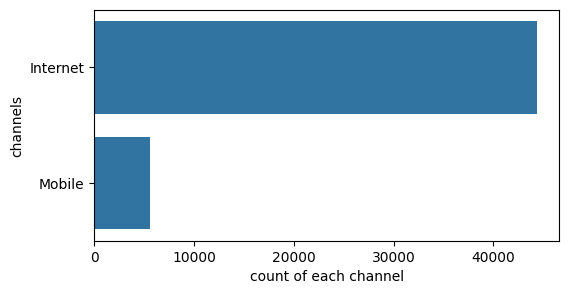

In [17]:

plt.figure(figsize=(6,3))
plt.ylabel('channels')
plt.xlabel('count of each channel')
sns.countplot( data=df["sales_channel"])
plt.show()

## Here we can clearly see that most bookings happen through the internet channel.

In [18]:
df['trip_type'].value_counts()

,count
trip_type,
RoundTrip,49497
OneWay,387
CircleTrip,116


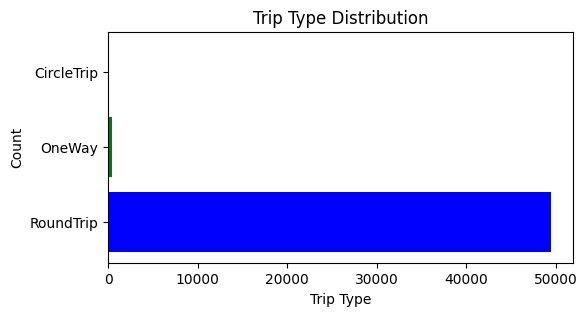

In [19]:
trip_types = ['RoundTrip', 'OneWay', 'CircleTrip']
counts = [49497, 387, 116]

plt.figure(figsize=(6, 3))
plt.barh(trip_types, counts, color=['blue', 'green', 'red'])
plt.title('Trip Type Distribution')
plt.xlabel('Trip Type')
plt.ylabel('Count')
plt.show()

## From this bar chart, we can see that most trips are round trips, while circle trips and one-way trips are quite rare

In [20]:
df['num_passengers'].value_counts()

,count
num_passengers,
1,31352
2,12804
3,2941
4,1784
5,561
6,289
7,114
8,89
9,66


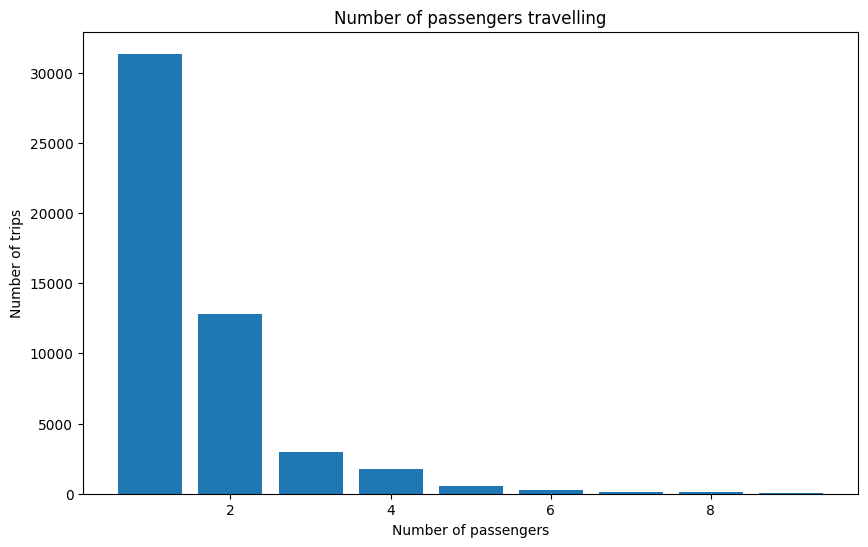

In [21]:
pas = np.arange(1,10)
count = [31352,12804,2941,1784,561,289,114,89,66]

plt.figure(figsize=(10,6))
plt.title('Number of passengers travelling')
plt.ylabel('Number of trips')
plt.xlabel('Number of passengers')
plt.bar(pas,count)
plt.show()

In [22]:
df_grouped = df.groupby('trip_type')['num_passengers'].value_counts().reset_index()
df_grouped

,trip_type,num_passengers,count
0,CircleTrip,1,69
1,CircleTrip,2,36
2,CircleTrip,3,6
3,CircleTrip,4,3
4,CircleTrip,6,1
5,CircleTrip,5,1
6,OneWay,1,254
7,OneWay,2,89
8,OneWay,3,20
9,OneWay,4,17


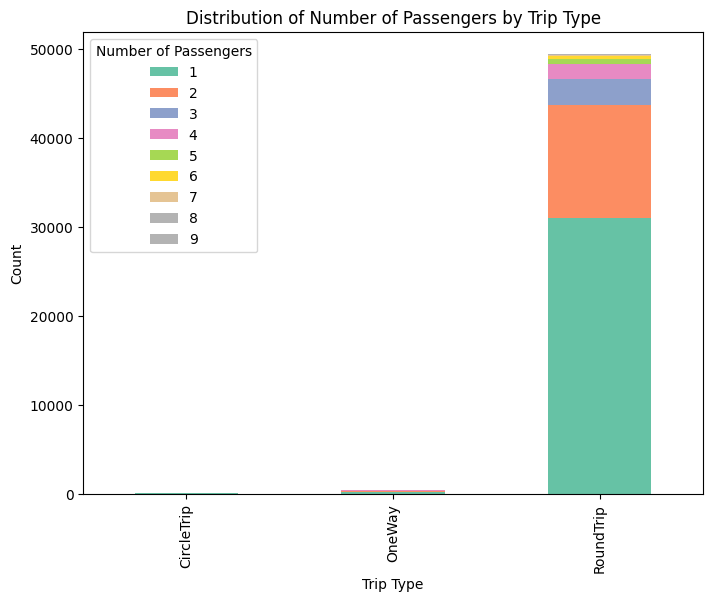

In [23]:
pivot_table = df.groupby(['trip_type', 'num_passengers']).size().unstack(fill_value=0)

pivot_table.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')
plt.title('Distribution of Number of Passengers by Trip Type')
plt.xlabel('Trip Type')
plt.ylabel('Count')
plt.legend(title='Number of Passengers')
plt.show()

## Here we can observe that most trips are round trips made by a single traveler, followed by trips with two people. Trips with three or four passengers are less common, and CircleTrips and one-way trips with more passengers are quite rare.

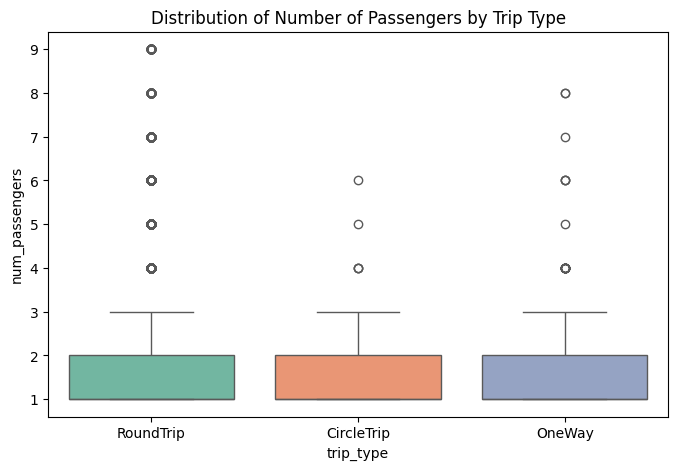

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x='trip_type', y='num_passengers', data = df, palette='Set2',hue= 'trip_type')
plt.ylabel('num_passengers')
plt.xlabel('trip_type')
plt.title('Distribution of Number of Passengers by Trip Type')
plt.show()

In [25]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [26]:
days =df['flight_day'].value_counts()
days

,count
flight_day,
1,8102
3,7674
2,7673
4,7424
5,6761
7,6554
6,5812


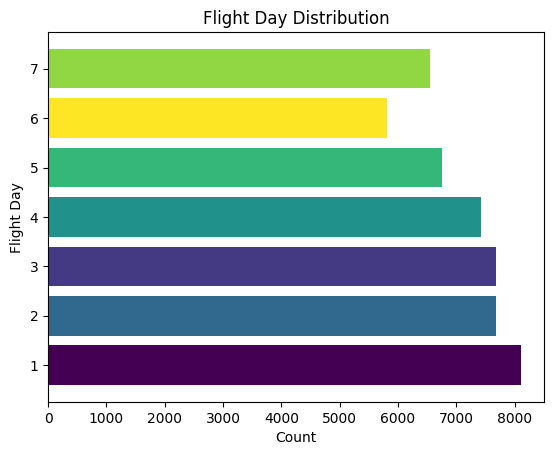

In [27]:
colors = plt.cm.viridis(np.linspace(0, 1, len(days)))
plt.barh(df['flight_day'].value_counts().index, df['flight_day'].value_counts().values,color = colors)
plt.xlabel('Count')
plt.ylabel('Flight Day')
plt.title('Flight Day Distribution')
plt.show()

## The plot shows the distribution of flights across different days of the week, with the x-axis representing the count of flights and the y-axis representing the days. Day 1 has the highest number of flights, while Day 7 has the lowest. This suggests a higher demand for flights on weekdays compared to weekends.

In [28]:
highest_booking = df['booking_origin'].value_counts().head(10)
highest_booking

,count
booking_origin,
Australia,17872
Malaysia,7174
South Korea,4559
Japan,3885
China,3387
Indonesia,2369
Taiwan,2077
Thailand,2030
India,1270


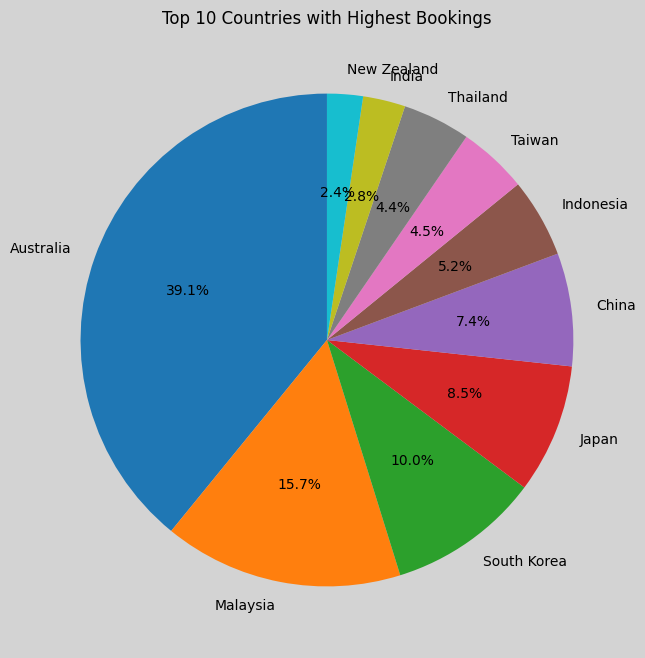

In [29]:
plt.figure(figsize=(12, 8), facecolor='lightgrey')
ax = plt.gca()
ax.set_facecolor('lightgrey')
plt.pie(highest_booking, labels=highest_booking.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Countries with Highest Bookings')
plt.show()

The pie chart illustrates that Australia dominates the booking market with 39.1% of total bookings, followed by Malaysia at 15.7% and South Korea at 10.0%. These three countries together account for a significant portion of the total bookings. Other countries like Japan, China, Indonesia, Taiwan, Thailand, India, and New Zealand have smaller shares, indicating a more distributed booking pattern among them.

In [30]:
book_conf = df['booking_complete'].value_counts()
book_conf

,count
booking_complete,
0,42522
1,7478


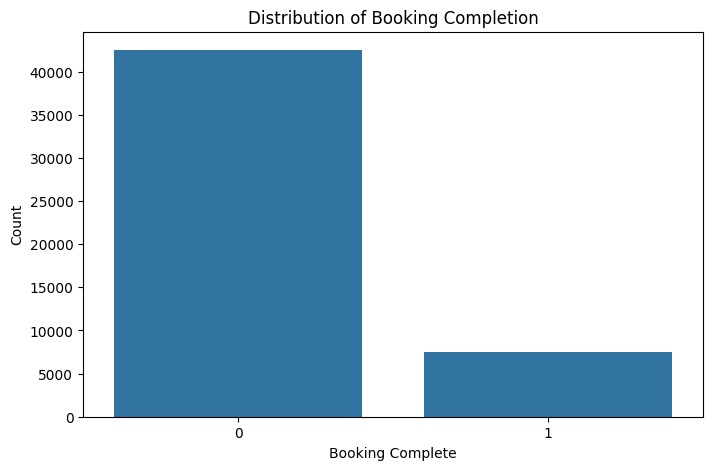

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='booking_complete')
plt.xlabel('Booking Complete')
plt.ylabel('Count')
plt.title('Distribution of Booking Completion')
plt.show()

## You can infer that about 85% of the bookings are incomplete, while only 15% are completed. This significant imbalance indicates that most customers either drop off before completing the booking process or encounter issues that prevent them from finalizing their bookings.

In [32]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


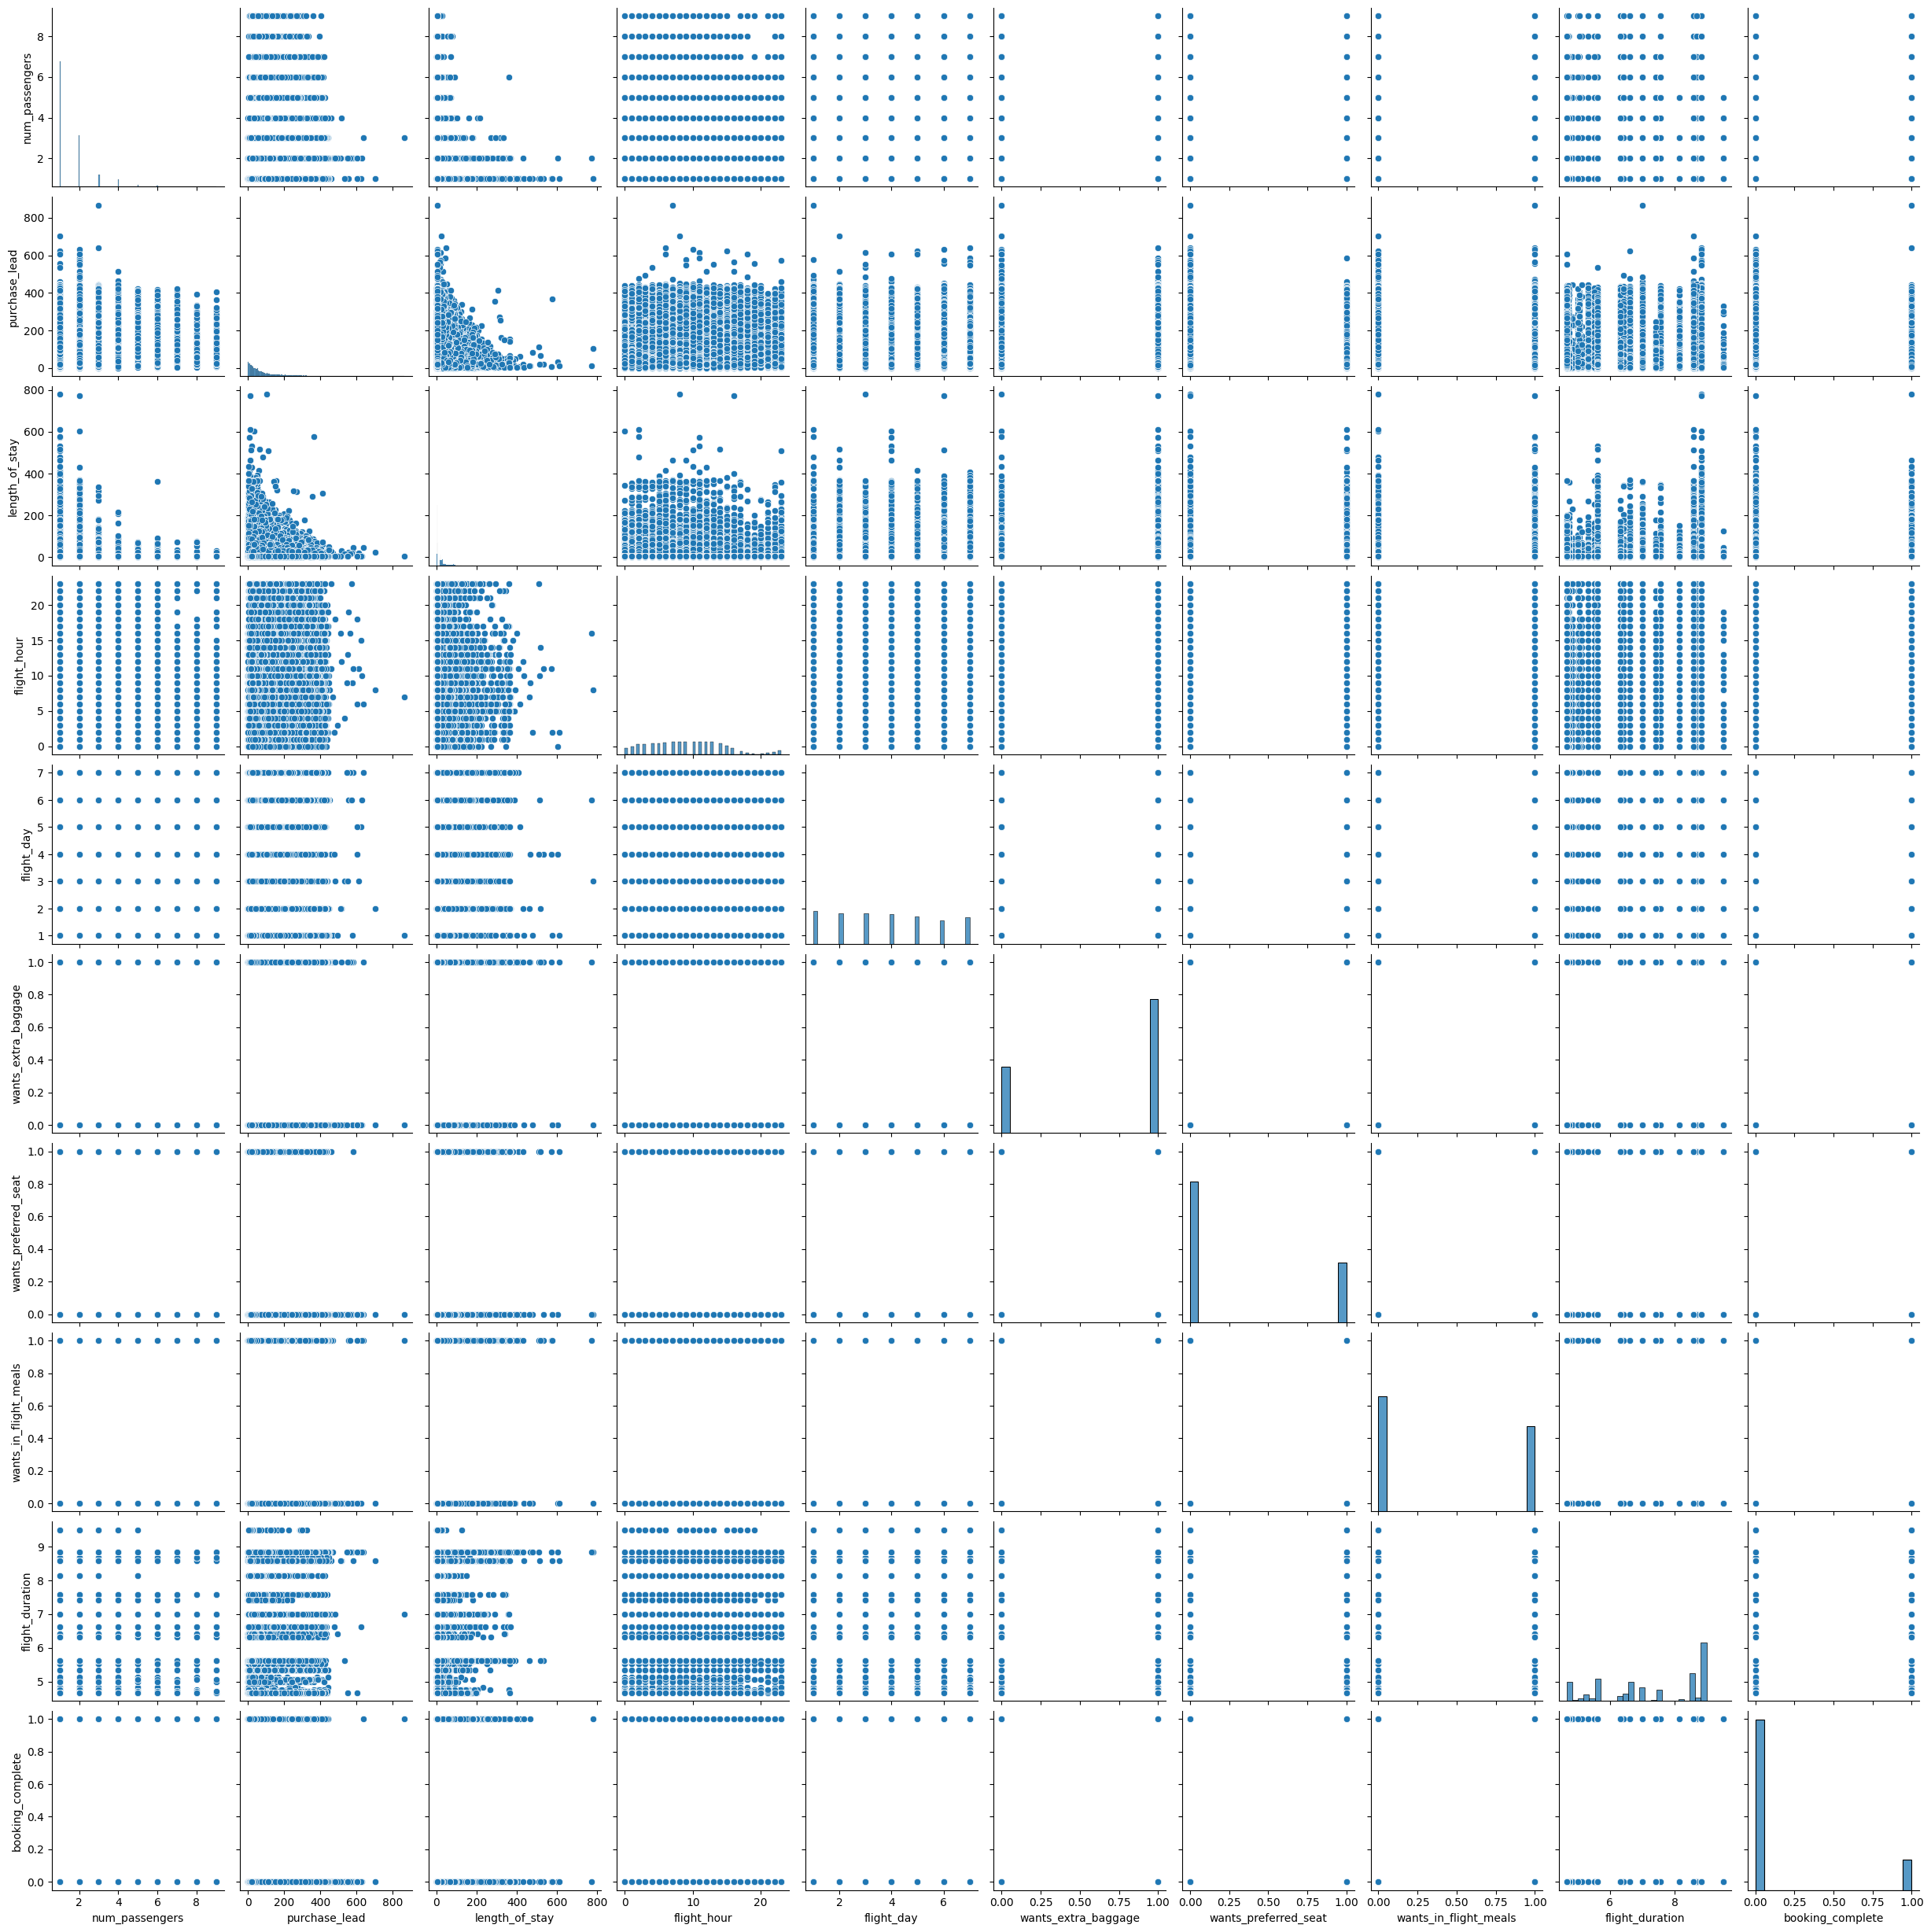

In [33]:
sns.pairplot(df)
plt.show()

In [34]:
num_df = df.select_dtypes(include=['int64','float64'])
num_df_cor= num_df.corr()

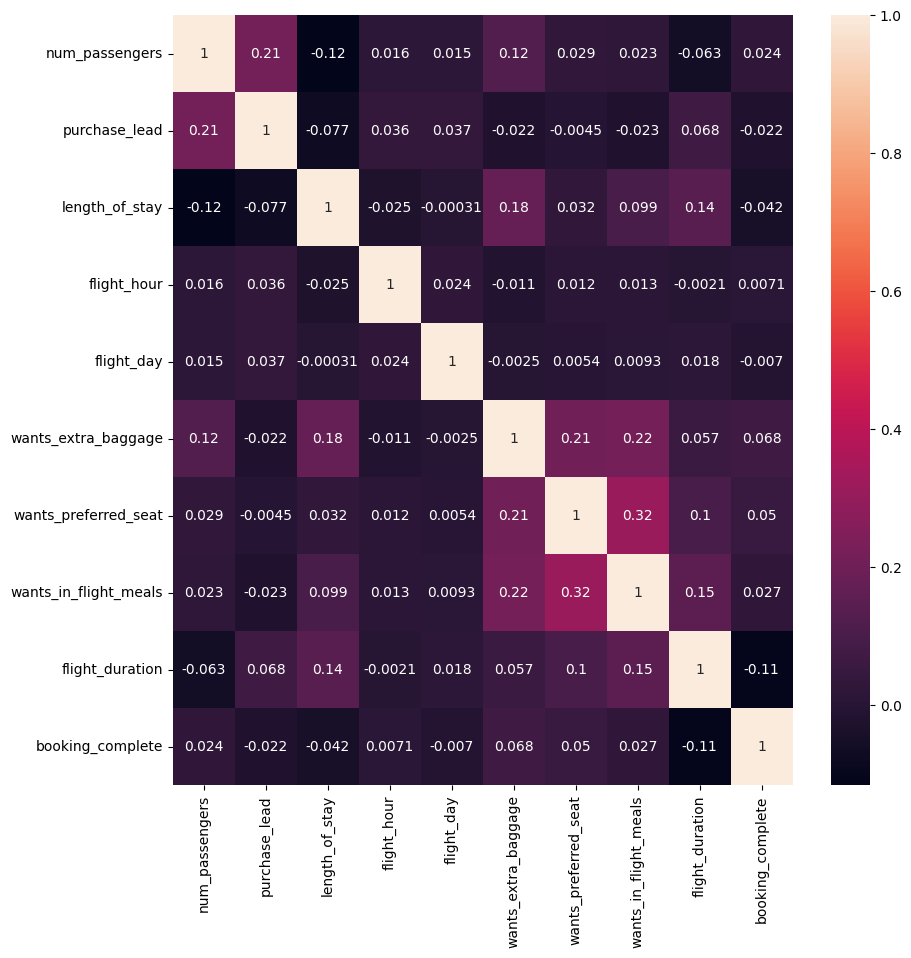

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(num_df_cor, annot = True)
plt.show()

  he heatmap displays the correlation matrix for numerical variables in the dataset. Notably:

1. booking_complete has weak correlations with other variables, with the highest positive correlation being with wants_extra_baggage (0.068) and a negative correlation with flight_duration (-0.11).

2. wants_preferred_seat and wants_in_flight_meals have a relatively high correlation (0.32), suggesting some redundancy.

3. Most variables have low to moderate correlations with each other, indicating minimal multicollinearity.

In [36]:
cat_cros = pd.crosstab(df['sales_channel'],df['trip_type'])
cat_cros

trip_type,CircleTrip,OneWay,RoundTrip
sales_channel,,,
Internet,112,369,43901
Mobile,4,18,5596


# Building Machine Learning Model

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
numeric_col = df[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour','flight_day', 'wants_extra_baggage',
                   'wants_preferred_seat','wants_in_flight_meals', 'flight_duration']]

In [39]:
scaler = StandardScaler()
num_scale = scaler.fit_transform(numeric_col)

In [40]:
cat_df =df.select_dtypes(include=['object'])
cat_df.head()

,sales_channel,trip_type,route,booking_origin
0,Internet,RoundTrip,AKLDEL,New Zealand
1,Internet,RoundTrip,AKLDEL,New Zealand
2,Internet,RoundTrip,AKLDEL,India
3,Internet,RoundTrip,AKLDEL,New Zealand
4,Internet,RoundTrip,AKLDEL,India


In [41]:
ohe = OneHotEncoder(sparse=False)
cat_encoded = ohe.fit_transform(cat_df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [42]:
cat_encoded = pd.DataFrame(cat_encoded, columns=ohe.get_feature_names_out(cat_df.columns))
num_scale  = pd.DataFrame(num_scale, columns=numeric_col.columns)

In [43]:
features_df = pd.concat([numeric_col,cat_encoded], axis =1 )

In [44]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 917 entries, num_passengers to booking_origin_Vietnam
dtypes: float64(909), int64(8)
memory usage: 349.8 MB


In [45]:
target = df['booking_complete']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size=0.2, random_state=42)

In [47]:
print(x_train.shape)
print(x_test.shape)

(40000, 917)
(10000, 917)


In [48]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [49]:
y_pred = model.predict(x_test)

In [50]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[8347  173]
 [1284  196]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.53      0.13      0.21      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.56      0.57     10000
weighted avg       0.82      0.85      0.81     10000



In [52]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.1 MB/s eta 0:00:00


In [53]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model
xgb_model.fit(features_df, target)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:29:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [54]:
y_predic = xgb_model.predict(x_test)

# Evaluate the model
print(confusion_matrix(y_test, y_predic))
print(classification_report(y_test, y_predic))


[[8450   70]
 [1272  208]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      8520
           1       0.75      0.14      0.24      1480

    accuracy                           0.87     10000
   macro avg       0.81      0.57      0.58     10000
weighted avg       0.85      0.87      0.82     10000



In [55]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X and y are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(features_df, target, test_size=0.2, random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of boosting rounds
    'max_depth': [3, 5, 7],                  # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2],       # Learning rate (shrinkage)
    'subsample': [0.6, 0.8, 1.0],            # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.8, 1.0],     # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],                  # Minimum loss reduction required to make a further partition
    'scale_pos_weight': [1, 5, 10]           # Balancing of positive and negative weights
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1')

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print(f"Best Parameters: {grid_search.best_params_}")





Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:19:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'scale_pos_weight': 5, 'subsample': 0.8}


In [56]:
# Use the best estimator to make predictions
best_xgb_model = grid_search.best_estimator_
y_predi = best_xgb_model.predict(X_test)

In [59]:
# Evaluate the tuned model
print(confusion_matrix(y_test, y_predi))
print(classification_report(y_test, y_predi))


[[6314 2206]
 [ 432 1048]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      8520
           1       0.32      0.71      0.44      1480

    accuracy                           0.74     10000
   macro avg       0.63      0.72      0.63     10000
weighted avg       0.85      0.74      0.77     10000

